In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import scipy.stats as stats

#file_path = 'AAHF21-RW-NO-VR-TRIAL-3-MOTIVE.csv'
file_path = 'ATSF08-RW-WITH-VR-TRIAL-1-MOTIVE.csv'
#file_path = 'MGNH15-RW-NO-VR-TRIAL-2-MOTIVE.csv'
data = pd.read_csv(file_path,on_bad_lines='skip',sep=',',header=[1,2,3,4,5])
data.columns = data.columns.droplevel(2)
data.columns = ['_'.join(map(str, col)).strip() for col in data.columns.values]
data.rename(columns={'Type_Name_Unnamed: 1_level_3_Time (Seconds)':'Time'},inplace=True)
data.rename(columns={'Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_3_Frame':'Frame'},inplace=True)

In [28]:
# Utility function to calculate angles
def calculate_angle(a, b, c):
    """
    Calculate the angle between three points a, b, and c
    with b as the vertex.
    """
    ab = a - b
    cb = c - b
    dot_product = np.dot(ab, cb)
    magnitude = np.linalg.norm(ab) * np.linalg.norm(cb)
    angle = np.arccos(dot_product / magnitude)  # Angle in radians
    return np.degrees(angle)  # Convert to degrees

# Calculate joint angles
def calculate_joint_angles(row):
    # Upper Arm angle (T10 -> LSHO -> LELB)
    upper_arm_angle = calculate_angle(
        np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']]),
        np.array([row['Marker_Skeleton:LSHO_Position_X'], row['Marker_Skeleton:LSHO_Position_Y'], row['Marker_Skeleton:LSHO_Position_Z']]),
        np.array([row['Marker_Skeleton:LELB_Position_X'], row['Marker_Skeleton:LELB_Position_Y'], row['Marker_Skeleton:LELB_Position_Z']])
    )
    
    # Lower Arm angle (LSHO -> LELB -> LWRB)
    lower_arm_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LSHO_Position_X'], row['Marker_Skeleton:LSHO_Position_Y'], row['Marker_Skeleton:LSHO_Position_Z']]),
        np.array([row['Marker_Skeleton:LELB_Position_X'], row['Marker_Skeleton:LELB_Position_Y'], row['Marker_Skeleton:LELB_Position_Z']]),
        np.array([row['Marker_Skeleton:LWRB_Position_X'], row['Marker_Skeleton:LWRB_Position_Y'], row['Marker_Skeleton:LWRB_Position_Z']])
    )

    # Wrist angle (LFRM -> LWRB -> LFIN)
    wrist_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LFRM_Position_X'], row['Marker_Skeleton:LFRM_Position_Y'], row['Marker_Skeleton:LFRM_Position_Z']]),
        np.array([row['Marker_Skeleton:LWRB_Position_X'], row['Marker_Skeleton:LWRB_Position_Y'], row['Marker_Skeleton:LWRB_Position_Z']]),
        np.array([row['Marker_Skeleton:LFIN_Position_X'], row['Marker_Skeleton:LFIN_Position_Y'], row['Marker_Skeleton:LFIN_Position_Z']])
    )
    wrist_angle = wrist_angle - 90
    

    # Neck angle (LBHD -> C7 -> T10)
    neck_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LBHD_Position_X'], row['Marker_Skeleton:LBHD_Position_Y'], row['Marker_Skeleton:LBHD_Position_Z']]),
        np.array([row['Marker_Skeleton:C7_Position_X'], row['Marker_Skeleton:C7_Position_Y'], row['Marker_Skeleton:C7_Position_Z']]),
        np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']])
    )
    neck_angle = 180 - neck_angle 
    
    if 'Marker_Skeleton:LPSI_Position_X' in row:
            
        # Trunk angle (LPSI -> T10 -> C7)
        trunk_angle = calculate_angle(
            np.array([row['Marker_Skeleton:LPSI_Position_X'], row['Marker_Skeleton:LPSI_Position_Y'], row['Marker_Skeleton:LPSI_Position_Z']]),
            np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']]),
            np.array([row['Marker_Skeleton:C7_Position_X'], row['Marker_Skeleton:C7_Position_Y'], row['Marker_Skeleton:C7_Position_Z']])
        )
    else:
        # Trunk angle (RPSI -> T10 -> C7)
        trunk_angle = calculate_angle(
            np.array([row['Marker_Skeleton:RPSI_Position_X'], row['Marker_Skeleton:RPSI_Position_Y'], row['Marker_Skeleton:RPSI_Position_Z']]),
            np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']]),
            np.array([row['Marker_Skeleton:C7_Position_X'], row['Marker_Skeleton:C7_Position_Y'], row['Marker_Skeleton:C7_Position_Z']])
        )
    trunk_angle = 180 - trunk_angle

    return pd.Series({
        'Upper_Arm_Angle': upper_arm_angle,
        'Lower_Arm_Angle': lower_arm_angle,
        'Wrist_Angle': wrist_angle,
        'Neck_Angle': neck_angle,
        'Trunk_Angle': trunk_angle
    })

# Apply the function to calculate joint angles
angles_df = data.apply(calculate_joint_angles, axis=1)

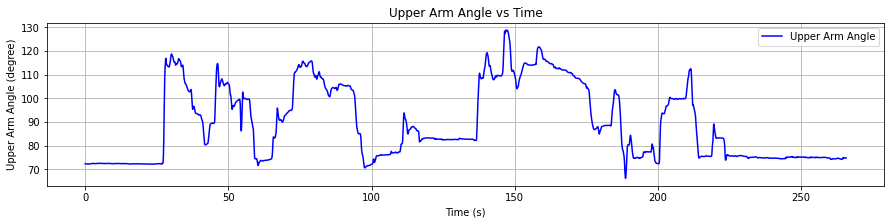

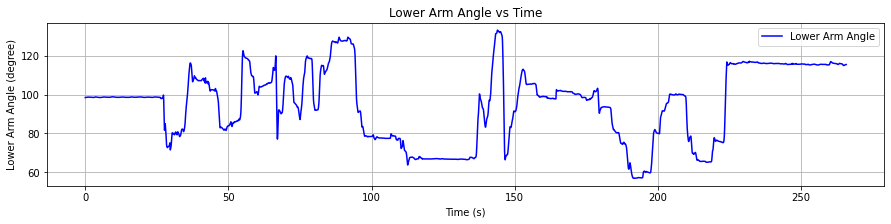

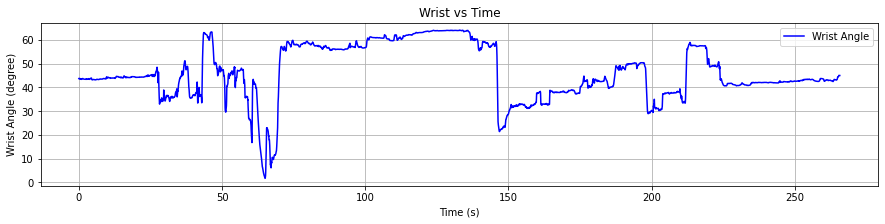

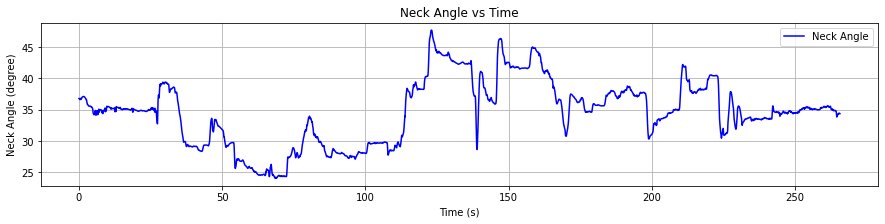

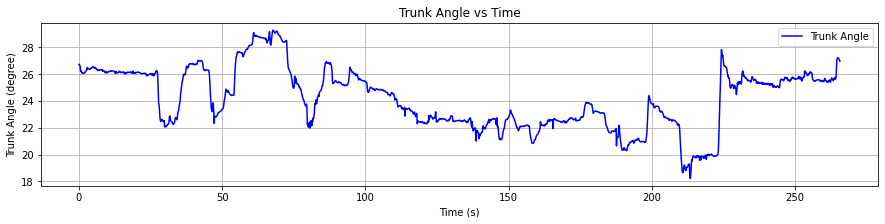

In [29]:

plt.figure(1,figsize=(15, 3))
plt.plot(data['Time'], angles_df['Upper_Arm_Angle'], linestyle='-', color='b', label='Upper Arm Angle')
plt.xlabel('Time (s)')
plt.ylabel('Upper Arm Angle (degree)')
plt.title('Upper Arm Angle vs Time')
plt.legend()
plt.grid(True)
#plt.show()

plt.figure(2,figsize=(15, 3))
plt.plot(data['Time'], angles_df['Lower_Arm_Angle'], linestyle='-', color='b', label='Lower Arm Angle')
plt.xlabel('Time (s)')
plt.ylabel('Lower Arm Angle (degree)')
plt.title('Lower Arm Angle vs Time')
plt.legend()
plt.grid(True)

plt.figure(3,figsize=(15, 3))
plt.plot(data['Time'], angles_df['Wrist_Angle'], linestyle='-', color='b', label='Wrist Angle')
plt.xlabel('Time (s)')
plt.ylabel('Wrist Angle (degree)')
plt.title('Wrist vs Time')
plt.legend()
plt.grid(True)

plt.figure(4,figsize=(15, 3))
plt.plot(data['Time'], angles_df['Neck_Angle'], linestyle='-', color='b', label='Neck Angle')
plt.xlabel('Time (s)')
plt.ylabel('Neck Angle (degree)')
plt.title('Neck Angle vs Time')
plt.legend()
plt.grid(True)

plt.figure(5,figsize=(15, 3))
plt.plot(data['Time'], angles_df['Trunk_Angle'], linestyle='-', color='b', label='Trunk Angle')
plt.xlabel('Time (s)')
plt.ylabel('Trunk Angle (degree)')
plt.title('Trunk Angle vs Time')
plt.legend()
plt.grid(True)

plt.show()

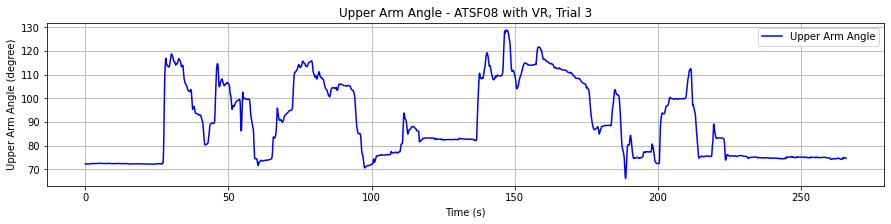

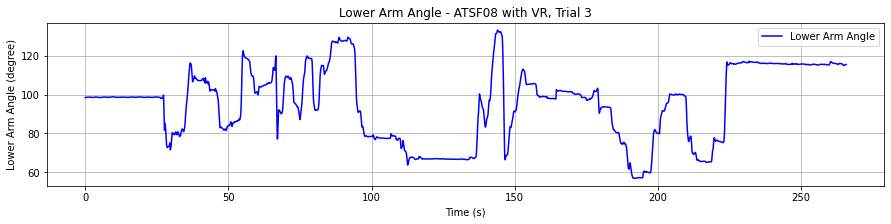

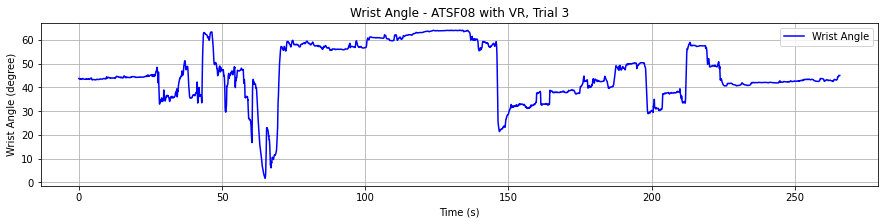

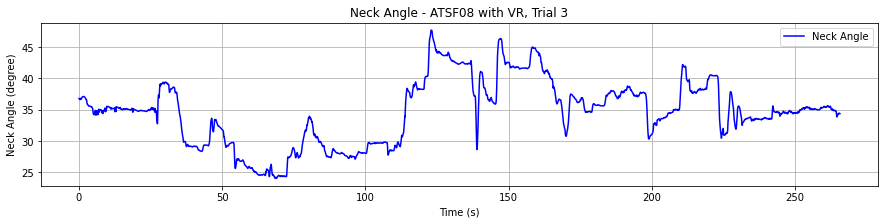

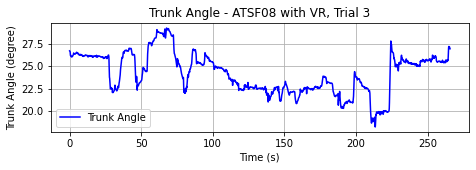

In [30]:
def clean_sudden_changes(dataframe, columns, threshold):
    """
    Removes sudden changes in specified columns of a DataFrame by replacing them
    with the preceding values.

    :param dataframe: pd.DataFrame - The input DataFrame
    :param columns: list - List of column names to clean
    :param threshold: float - The allowed threshold for change
    :return: pd.DataFrame - The modified DataFrame
    """
    # Copy the dataframe to avoid modifying the original
    cleaned_df = dataframe.copy()
    
    # Iterate over the specified columns
    for column in columns:
        # Iterate over the rows for the current column
        for i in range(1, len(cleaned_df)):
            current_value = cleaned_df.loc[i, column]
            previous_value = cleaned_df.loc[i - 1, column]
            
            # Check for sudden change
            if abs(current_value - previous_value) > threshold:
                cleaned_df.loc[i, column] = previous_value
    
    return cleaned_df

# Example usage
columns_to_clean = ['Upper_Arm_Angle', 'Lower_Arm_Angle','Wrist_Angle','Neck_Angle','Trunk_Angle']  # List of columns to clean
threshold = 15  # Define a threshold for sudden changes
angles_df_filtered = clean_sudden_changes(angles_df, columns_to_clean, threshold)



plt.figure(1,figsize=(15, 3))
plt.plot(data['Time'], angles_df_filtered['Upper_Arm_Angle'], linestyle='-', color='b', label='Upper Arm Angle')
plt.xlabel('Time (s)')
plt.ylabel('Upper Arm Angle (degree)')
plt.title('Upper Arm Angle - ATSF08 with VR, Trial 3')
plt.legend()
plt.grid(True)
#plt.show()

plt.figure(2,figsize=(15, 3))
plt.plot(data['Time'], angles_df_filtered['Lower_Arm_Angle'], linestyle='-', color='b', label='Lower Arm Angle')
plt.xlabel('Time (s)')
plt.ylabel('Lower Arm Angle (degree)')
plt.title('Lower Arm Angle - ATSF08 with VR, Trial 3')
plt.legend()
plt.grid(True)

plt.figure(3,figsize=(15, 3))
plt.plot(data['Time'], angles_df_filtered['Wrist_Angle'], linestyle='-', color='b', label='Wrist Angle')
plt.xlabel('Time (s)')
plt.ylabel('Wrist Angle (degree)')
plt.title('Wrist Angle - ATSF08 with VR, Trial 3')
plt.legend()
plt.grid(True)

plt.figure(4,figsize=(15, 3))
plt.plot(data['Time'], angles_df_filtered['Neck_Angle'], linestyle='-', color='b', label='Neck Angle')
plt.xlabel('Time (s)')
plt.ylabel('Neck Angle (degree)')
plt.title('Neck Angle - ATSF08 with VR, Trial 3')
plt.legend()
plt.grid(True)

plt.figure(5,figsize=(7.5, 2))
plt.plot(data['Time'], angles_df_filtered['Trunk_Angle'], linestyle='-', color='b', label='Trunk Angle')
plt.xlabel('Time (s)')
plt.ylabel('Trunk Angle (degree)')
plt.title('Trunk Angle - ATSF08 with VR, Trial 3')
plt.legend()
plt.grid(True)

plt.show()

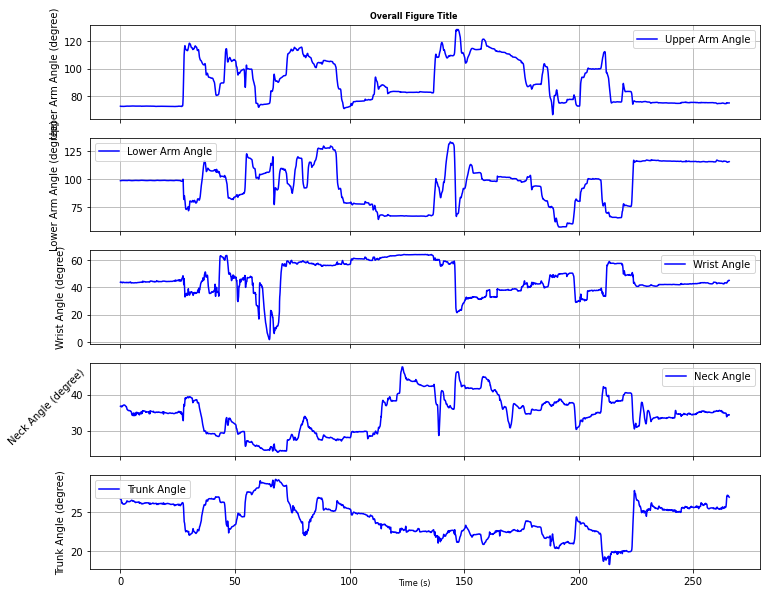

In [31]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 10), sharex=True)

axes[0].plot(data['Time'], angles_df_filtered['Upper_Arm_Angle'], linestyle='-', color='b', label='Upper Arm Angle')
axes[0].set_ylabel('Upper Arm Angle (degree)')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(data['Time'], angles_df_filtered['Lower_Arm_Angle'], linestyle='-', color='b', label='Lower Arm Angle')
axes[1].set_ylabel('Lower Arm Angle (degree)')
axes[1].grid(True)
axes[1].legend()

axes[2].plot(data['Time'], angles_df_filtered['Wrist_Angle'], linestyle='-', color='b', label='Wrist Angle')
axes[2].set_ylabel('Wrist Angle (degree)')
axes[2].grid(True)
axes[2].legend()

axes[3].plot(data['Time'], angles_df_filtered['Neck_Angle'], linestyle='-', color='b', label='Neck Angle')
axes[3].set_ylabel('Neck Angle (degree)',rotation=45, labelpad=20)
axes[3].grid(True)
axes[3].legend()

axes[4].plot(data['Time'], angles_df_filtered['Trunk_Angle'], linestyle='-', color='b', label='Trunk Angle')
axes[4].set_ylabel('Trunk Angle (degree)')
axes[4].grid(True)
axes[4].legend()

fig.supxlabel('Time (s)',fontsize=8,y=0.1)
fig.suptitle("Overall Figure Title", fontsize=8, fontweight='bold',y=0.90)

plt.show()

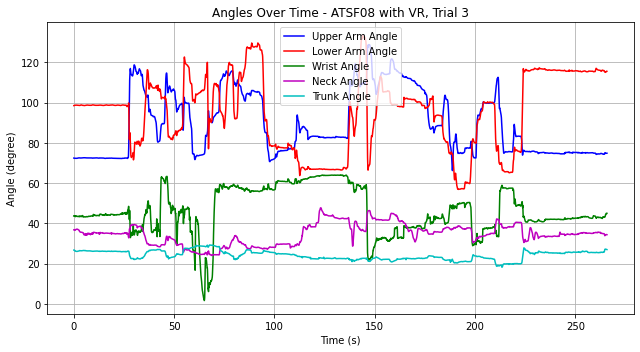

In [47]:
# Create a figure
fig, ax = plt.subplots(figsize=(9, 5))

# Plot all angles on the same graph with different colors
ax.plot(data['Time'], angles_df_filtered['Upper_Arm_Angle'], linestyle='-', color='b', label='Upper Arm Angle')
ax.plot(data['Time'], angles_df_filtered['Lower_Arm_Angle'], linestyle='-', color='r', label='Lower Arm Angle')
ax.plot(data['Time'], angles_df_filtered['Wrist_Angle'], linestyle='-', color='g', label='Wrist Angle')
ax.plot(data['Time'], angles_df_filtered['Neck_Angle'], linestyle='-', color='m', label='Neck Angle')
ax.plot(data['Time'], angles_df_filtered['Trunk_Angle'], linestyle='-', color='c', label='Trunk Angle')

# Labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (degree)')
ax.set_title('Angles Over Time - ATSF08 with VR, Trial 3')
ax.grid(True)
ax.legend()

plt.tight_layout()
output_path = "Rula_angles.pdf"  # Specify your desired file path
plt.savefig(output_path, format='pdf')

# Show the plot
plt.show()


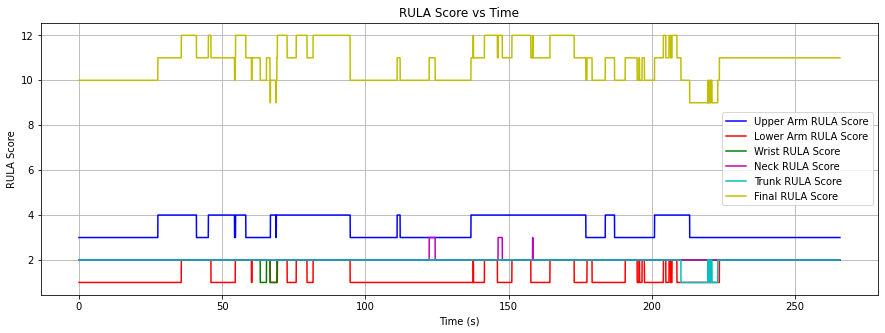

In [36]:
# RULA scoring based on angles (simplified example)
def rula_scoring(row):
    """
    Computes RULA scores based on the given joint angles.
    """

    # Upper Arm Score
    if row['Upper_Arm_Angle'] > 90:
        upper_arm_score = 4
    elif row['Upper_Arm_Angle'] >= 45:
        upper_arm_score = 3
    elif row['Upper_Arm_Angle'] >= 20:
        upper_arm_score = 2
    elif row['Upper_Arm_Angle'] < -20:  # Handling negative angles (extension)
        upper_arm_score = 2
    else:
        upper_arm_score = 1

    # Lower Arm Score
    if 60 <= row['Lower_Arm_Angle'] <= 100:
        lower_arm_score = 1
    else:
        lower_arm_score = 2

    # Wrist Score
    if abs(row['Wrist_Angle']) < 15:
        wrist_score = 1
    else:
        wrist_score = 2

    # Wrist Twist (if available)
    if 'Wrist_Twist' in row:
        if abs(row['Wrist_Twist']) > 15:
            wrist_score += 1

    # Neck Score
    if row['Neck_Angle'] > 45:
        neck_score = 3
    elif row['Neck_Angle'] >= 20:
        neck_score = 2
    elif row['Neck_Angle'] < -10:  # Handling backward neck extension
        neck_score = 2
    else:
        neck_score = 1

    # Trunk Score
    if row['Trunk_Angle'] > 60:
        trunk_score = 4
    elif row['Trunk_Angle'] > 45:
        trunk_score = 3
    elif row['Trunk_Angle'] >= 20:
        trunk_score = 2
    elif row['Trunk_Angle'] < -5:  # Handling trunk extension
        trunk_score = 2
    else:
        trunk_score = 1

        
        
        
        

    # Final RULA Score (simplified version)
    final_rula_score = (
        upper_arm_score +
        lower_arm_score +
        wrist_score +
        neck_score +
        trunk_score
    )

    return pd.Series({
        'UpperArm_Score': upper_arm_score,
        'LowerArm_Score': lower_arm_score,
        'Wrist_Score': wrist_score,
        'Neck_Score': neck_score,
        'Trunk_Score': trunk_score,
        'Final_RULA_Score': final_rula_score
    })

# Apply scoring function
scores_df = angles_df_filtered.apply(rula_scoring, axis=1)

plt.figure(figsize=(15, 5))
plt.plot(data['Time'], scores_df['UpperArm_Score'], linestyle='-', color='b', label='Upper Arm RULA Score')
plt.plot(data['Time'], scores_df['LowerArm_Score'], linestyle='-', color='r', label='Lower Arm RULA Score')
plt.plot(data['Time'], scores_df['Wrist_Score'], linestyle='-', color='g', label='Wrist RULA Score')
plt.plot(data['Time'], scores_df['Neck_Score'], linestyle='-', color='m', label='Neck RULA Score')
plt.plot(data['Time'], scores_df['Trunk_Score'], linestyle='-', color='c', label='Trunk RULA Score')
plt.plot(data['Time'], scores_df['Final_RULA_Score'], linestyle='-', color='y', label='Final RULA Score')
plt.xlabel('Time (s)')
plt.ylabel('RULA Score')
plt.title('RULA Score vs Time')
plt.legend()
plt.grid(True)
plt.show()

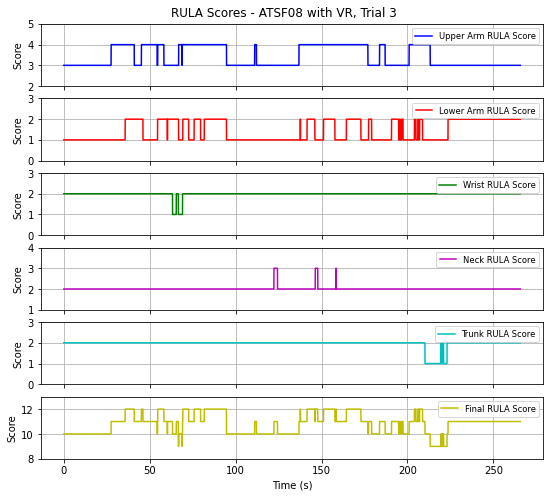

In [49]:
fig, axes = plt.subplots(6, 1, figsize=(9, 8), sharex=True, gridspec_kw={'hspace': 0.2})

scores = ['UpperArm_Score', 'LowerArm_Score', 'Wrist_Score', 'Neck_Score', 'Trunk_Score', 'Final_RULA_Score']
colors = ['b', 'r', 'g', 'm', 'c', 'y']
labels = ['Upper Arm RULA Score', 'Lower Arm RULA Score', 'Wrist RULA Score', 'Neck RULA Score', 'Trunk RULA Score', 'Final RULA Score']

for ax, score, color, label in zip(axes, scores, colors, labels):
    ax.plot(data['Time'], scores_df[score], linestyle='-', color=color, label=label)
    ax.set_ylabel('Score')
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)
    ax.set_ylim(min(scores_df[score]) - 1, max(scores_df[score]) + 1)

axes[-1].set_xlabel('Time (s)')
plt.suptitle('RULA Scores - ATSF08 with VR, Trial 3', y=0.91)

#plt.tight_layout()
output_path = "Rula_scores.pdf"  # Specify your desired file path
plt.savefig(output_path, format='pdf',bbox_inches='tight')

plt.show()

In [7]:
def process_csv(directory):
    filepath = directory
    data = pd.read_csv(filepath,on_bad_lines='skip',sep=',',header=[1,2,3,4,5])
    data.columns = data.columns.droplevel(2)
    data.columns = ['_'.join(map(str, col)).strip() for col in data.columns.values]
    data.rename(columns={'Type_Name_Unnamed: 1_level_3_Time (Seconds)':'Time'},inplace=True)
    data.rename(columns={'Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_3_Frame':'Frame'},inplace=True)
    angles_df = data.apply(calculate_joint_angles, axis=1)
    columns_to_clean = ['Upper_Arm_Angle', 'Lower_Arm_Angle','Wrist_Angle','Neck_Angle','Trunk_Angle']  # List of columns to clean
    threshold = 20  # Define a threshold for sudden changes
    angles_df_filtered = clean_sudden_changes(angles_df, columns_to_clean, threshold)
    scores_df = angles_df_filtered.apply(rula_scoring, axis=1)
    
    return scores_df.mean()

#wbc_scores = process_csv("ATSF08-RW-WITH-VR-TRIAL-1-MOTIVE.csv")
#sbc_scores = process_csv("MGNH15-RW-NO-VR-TRIAL-2-MOTIVE.csv")



In [9]:
import re
import os
def extract_trial_number(filename):
    """Extract the trial number from the filename."""
    match = re.search(r'TRIAL-(\d+)', filename)
    return int(match.group(1)) if match else None

def analyze_csv_files(base_directory, output_file):
    results = []
    
    for study_type in ["CHIRON", "WBC"]:
        study_path = os.path.join(base_directory, study_type)
        print(study_path)
        if not os.path.exists(study_path):
            continue
        
        for vr_type in ["NO-VR", "WITH-VR"]:
            vr_path = os.path.join(study_path, vr_type)
            print(vr_path)
            if not os.path.exists(vr_path):
                continue
            
            for user_id in os.listdir(vr_path):
                user_path = os.path.join(vr_path, user_id)
                if not os.path.isdir(user_path):
                    continue
                print(user_path)
                user_path = os.path.join(user_path, 'CSVS')
                for csv_file in os.listdir(user_path):
                    if csv_file.endswith(".csv"):                        
                        file_path = os.path.join(user_path, csv_file)
                        print(file_path)
                        trial_number = extract_trial_number(csv_file)
                        
                        if trial_number is not None:
                            try:
                                scores = process_csv(file_path)

                                result_entry = {
                                    "User_ID": user_id,
                                    "Study_Type": study_type,
                                    "VR_Type": vr_type,
                                    "Trial_Number": trial_number,
                                }

                                result_entry.update(scores.to_dict())
                                results.append(result_entry)
                            except:
                                print("Error")
                                continue
    
    # Convert results to DataFrame and save to CSV
    df = pd.DataFrame(results)
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

# Example usage
base_directory = r'E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data'
output_file = r'C:\Users\emanu\Desktop\Sophia Thesis\results.csv'
analyze_csv_files(base_directory, output_file)

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-NO-VR-TRIAL-1-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-NO-VR-TRIAL-2-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-NO-VR-TRIAL-3-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-WITH-VR-TRIAL-1-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-WITH-VR-TRIAL-2-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-WITH-VR-TRIAL-3-MOTIVE.csv
Error
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-SIM-NO-VR-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\d

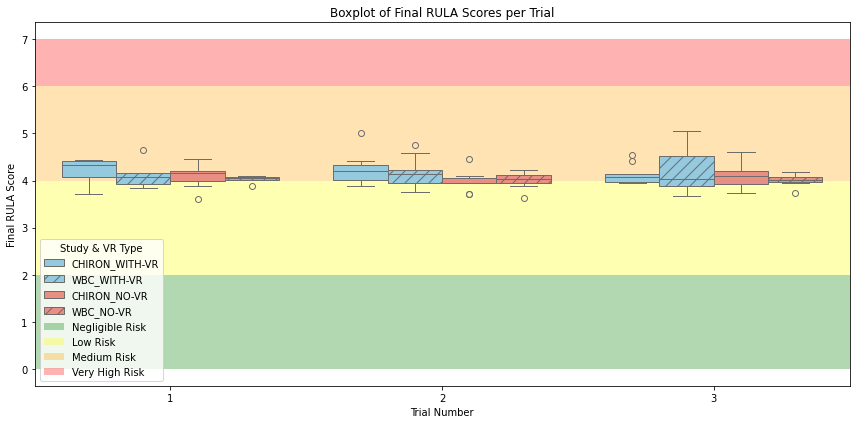

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "results_RULA_v2.csv"
df = pd.read_csv(file_path)

# Define the order and colors
order = ["CHIRON_WITH-VR", "WBC_WITH-VR", "CHIRON_NO-VR", "WBC_NO-VR"]
colors = {"CHIRON_WITH-VR": "skyblue", "CHIRON_NO-VR": "salmon", "WBC_WITH-VR": "skyblue", "WBC_NO-VR": "salmon"}
hatches = {"CHIRON_WITH-VR": "", "WBC_WITH-VR": "//", "CHIRON_NO-VR": "", "WBC_NO-VR": "//"}

# Create a new column for grouping
df["Group"] = df["Study_Type"] + "_" + df["VR_Type"]

df["Group"] = pd.Categorical(df["Group"], categories=order, ordered=True)

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Trial_Number", y="Final_RULA_Score", hue="Group", data=df, 
            order=sorted(df["Trial_Number"].unique()), hue_order=order, palette=colors)

# Apply hatching
ax = plt.gca()
num_trials = len(df["Trial_Number"].unique())
for i, box in enumerate(ax.patches):
    if i == 1:
        box.set_hatch("")
    if i == 2:
        box.set_hatch("")
    if i == 3:
        box.set_hatch("//")
    if i == 4:
        box.set_hatch("//")
    if i == 5:
        box.set_hatch("//")
    if i == 6:
        box.set_hatch("")
    if i == 7:
        box.set_hatch("")
    if i == 8:
        box.set_hatch("")
    if i == 9:
        box.set_hatch("//")
    if i == 10:
        box.set_hatch("//")
    if i == 11:
        box.set_hatch("//")
    if i == 12:
        box.set_hatch("")
    if i == 13:
        box.set_hatch("//")
    if i == 14:
        box.set_hatch("")
    if i == 15:
        box.set_hatch("//")
        

# Define background color bands for different severity levels
plt.axhspan(0, 2, facecolor='green', alpha=0.3, label="Negligible Risk")
plt.axhspan(2, 4, facecolor='yellow', alpha=0.3, label="Low Risk")
plt.axhspan(4, 6, facecolor='orange', alpha=0.3, label="Medium Risk")
plt.axhspan(6, 7, facecolor='red', alpha=0.3, label="Very High Risk")

plt.xlabel("Trial Number")
plt.ylabel("Final RULA Score")
plt.title("Boxplot of Final RULA Scores per Trial")
plt.legend(title="Study & VR Type")
plt.tight_layout()
output_path = "RULA_boxplot.pdf"  # Specify your desired file path
plt.savefig(output_path, format='pdf')
plt.show()

In [5]:
####### RODA DAQUIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import scipy.stats as stats

# Utility function to calculate angles
def calculate_angle(a, b, c):
    """
    Calculate the angle between three points a, b, and c
    with b as the vertex.
    """
    ab = a - b
    cb = c - b
    dot_product = np.dot(ab, cb)
    magnitude = np.linalg.norm(ab) * np.linalg.norm(cb)
    angle = np.arccos(dot_product / magnitude)  # Angle in radians
    return np.degrees(angle)  # Convert to degrees

# Calculate joint angles
def calculate_joint_angles(row):
    # Upper Arm angle (T10 -> LSHO -> LELB)
    upper_arm_angle = calculate_angle(
        np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']]),
        np.array([row['Marker_Skeleton:LSHO_Position_X'], row['Marker_Skeleton:LSHO_Position_Y'], row['Marker_Skeleton:LSHO_Position_Z']]),
        np.array([row['Marker_Skeleton:LELB_Position_X'], row['Marker_Skeleton:LELB_Position_Y'], row['Marker_Skeleton:LELB_Position_Z']])
    )
    
    # Lower Arm angle (LSHO -> LELB -> LWRB)
    lower_arm_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LSHO_Position_X'], row['Marker_Skeleton:LSHO_Position_Y'], row['Marker_Skeleton:LSHO_Position_Z']]),
        np.array([row['Marker_Skeleton:LELB_Position_X'], row['Marker_Skeleton:LELB_Position_Y'], row['Marker_Skeleton:LELB_Position_Z']]),
        np.array([row['Marker_Skeleton:LWRB_Position_X'], row['Marker_Skeleton:LWRB_Position_Y'], row['Marker_Skeleton:LWRB_Position_Z']])
    )

    # Wrist angle (LFRM -> LWRB -> LFIN)
    wrist_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LFRM_Position_X'], row['Marker_Skeleton:LFRM_Position_Y'], row['Marker_Skeleton:LFRM_Position_Z']]),
        np.array([row['Marker_Skeleton:LWRB_Position_X'], row['Marker_Skeleton:LWRB_Position_Y'], row['Marker_Skeleton:LWRB_Position_Z']]),
        np.array([row['Marker_Skeleton:LFIN_Position_X'], row['Marker_Skeleton:LFIN_Position_Y'], row['Marker_Skeleton:LFIN_Position_Z']])
    )
    wrist_angle = wrist_angle - 90
    

    # Neck angle (LBHD -> C7 -> T10)
    neck_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LBHD_Position_X'], row['Marker_Skeleton:LBHD_Position_Y'], row['Marker_Skeleton:LBHD_Position_Z']]),
        np.array([row['Marker_Skeleton:C7_Position_X'], row['Marker_Skeleton:C7_Position_Y'], row['Marker_Skeleton:C7_Position_Z']]),
        np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']])
    )
    neck_angle = 180 - neck_angle 
    
    if 'Marker_Skeleton:LPSI_Position_X' in row:
            
        # Trunk angle (LPSI -> T10 -> C7)
        trunk_angle = calculate_angle(
            np.array([row['Marker_Skeleton:LPSI_Position_X'], row['Marker_Skeleton:LPSI_Position_Y'], row['Marker_Skeleton:LPSI_Position_Z']]),
            np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']]),
            np.array([row['Marker_Skeleton:C7_Position_X'], row['Marker_Skeleton:C7_Position_Y'], row['Marker_Skeleton:C7_Position_Z']])
        )
    else:
        # Trunk angle (RPSI -> T10 -> C7)
        trunk_angle = calculate_angle(
            np.array([row['Marker_Skeleton:RPSI_Position_X'], row['Marker_Skeleton:RPSI_Position_Y'], row['Marker_Skeleton:RPSI_Position_Z']]),
            np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']]),
            np.array([row['Marker_Skeleton:C7_Position_X'], row['Marker_Skeleton:C7_Position_Y'], row['Marker_Skeleton:C7_Position_Z']])
        )
    trunk_angle = 180 - trunk_angle

    return pd.Series({
        'Upper_Arm_Angle': upper_arm_angle,
        'Lower_Arm_Angle': lower_arm_angle,
        'Wrist_Angle': wrist_angle,
        'Neck_Angle': neck_angle,
        'Trunk_Angle': trunk_angle
    })

# RULA scoring based on angles (simplified example)
def rula_scoring(row):
    """
    Computes RULA scores based on the given joint angles.
    """

    # Upper Arm Score
    if row['Upper_Arm_Angle'] > 90:
        upper_arm_score = 4
    elif row['Upper_Arm_Angle'] >= 45:
        upper_arm_score = 3
    elif row['Upper_Arm_Angle'] >= 20:
        upper_arm_score = 2
    elif row['Upper_Arm_Angle'] < -20:  # Handling negative angles (extension)
        upper_arm_score = 2
    else:
        upper_arm_score = 1

    # Lower Arm Score
    if 60 <= row['Lower_Arm_Angle'] <= 100:
        lower_arm_score = 1
    else:
        lower_arm_score = 2

    # Wrist Score
    if abs(row['Wrist_Angle']) < 15:
        wrist_score = 2
    else:
        wrist_score = 3

    # Wrist Twist (if available)
    if 'Wrist_Twist' in row:
        if abs(row['Wrist_Twist']) > 15:
            wrist_score += 1
    wrist_twist = 1
    # Neck Score
    if row['Neck_Angle'] > 45:
        neck_score = 3
    elif row['Neck_Angle'] >= 20:
        neck_score = 2
    elif row['Neck_Angle'] < -10:  # Handling backward neck extension
        neck_score = 2
    else:
        neck_score = 1

    # Trunk Score
    if row['Trunk_Angle'] > 60:
        trunk_score = 4
    elif row['Trunk_Angle'] > 45:
        trunk_score = 3
    elif row['Trunk_Angle'] >= 20:
        trunk_score = 2
    elif row['Trunk_Angle'] < -5:  # Handling trunk extension
        trunk_score = 2
    else:
        trunk_score = 1
    
    neck_trunk_score = trunk_score+neck_score
    
    table = {
            (1, 1): [ [1, 2], [2, 2], [2, 3], [3, 3] ],
            (1, 2): [ [2, 2], [2, 3], [3, 3], [3, 3] ],
            (1, 3): [ [2, 3], [3, 3], [3, 3], [3, 3] ],

            (2, 1): [ [2, 2], [3, 3], [3, 3], [3, 3] ],
            (2, 2): [ [3, 3], [3, 3], [4, 4], [4, 4] ],
            (2, 3): [ [3, 3], [4, 4], [4, 4], [4, 4] ],

            (3, 1): [ [3, 3], [3, 3], [4, 4], [4, 4] ],
            (3, 2): [ [4, 4], [4, 4], [4, 5], [5, 5] ],
            (3, 3): [ [4, 4], [4, 5], [5, 5], [5, 5] ],

            (4, 1): [ [4, 4], [4, 4], [5, 5], [5, 5] ],
            (4, 2): [ [5, 5], [5, 5], [5, 6], [6, 6] ],
            (4, 3): [ [5, 5], [5, 6], [6, 6], [6, 6] ],

            (5, 1): [ [5, 5], [5, 5], [6, 6], [6, 6] ],
            (5, 2): [ [6, 6], [6, 6], [7, 7], [7, 7] ],
            (5, 3): [ [6, 6], [7, 7], [7, 7], [7, 7] ],

            (6, 1): [ [7, 7], [7, 7], [8, 8], [8, 8] ],
            (6, 2): [ [8, 8], [8, 8], [9, 9], [9, 9] ],
            (6, 3): [ [8, 8], [9, 9], [9, 9], [9, 9] ]
        }
        
    arm_score = table.get((upper_arm_score, lower_arm_score), None)[wrist_score - 1][wrist_twist - 1]
        
    table_c = {
        1: [1, 2, 3, 4, 5, 5, 5],
        2: [2, 2, 3, 4, 5, 5, 5],
        3: [3, 3, 3, 4, 4, 5, 5],
        4: [3, 4, 4, 4, 5, 6, 6],
        5: [4, 4, 4, 5, 6, 7, 7],
        6: [4, 4, 5, 6, 7, 7, 7],
        7: [5, 5, 6, 6, 7, 7, 7],
        8: [5, 5, 6, 7, 7, 7, 7]
    }

    # Adjusting 8+ to be handled as 8
    arm_score = min(arm_score, 8)
    neck_trunk_score = min(neck_trunk_score, 7)

    # Final RULA Score (simplified version)
    final_rula_score = table_c.get(arm_score, None)[neck_trunk_score - 1]
    
    return pd.Series({
        'UpperArm_Score': upper_arm_score,
        'LowerArm_Score': lower_arm_score,
        'Wrist_Score': wrist_score,
        'Neck_Score': neck_score,
        'Trunk_Score': trunk_score,
        'Final_RULA_Score': final_rula_score
    })

def clean_sudden_changes(dataframe, columns, threshold):
    """
    Removes sudden changes in specified columns of a DataFrame by replacing them
    with the preceding values.

    :param dataframe: pd.DataFrame - The input DataFrame
    :param columns: list - List of column names to clean
    :param threshold: float - The allowed threshold for change
    :return: pd.DataFrame - The modified DataFrame
    """
    # Copy the dataframe to avoid modifying the original
    cleaned_df = dataframe.copy()
    
    # Iterate over the specified columns
    for column in columns:
        # Iterate over the rows for the current column
        for i in range(1, len(cleaned_df)):
            current_value = cleaned_df.loc[i, column]
            previous_value = cleaned_df.loc[i - 1, column]
            
            # Check for sudden change
            if abs(current_value - previous_value) > threshold:
                cleaned_df.loc[i, column] = previous_value
    
    return cleaned_df

def process_csv(directory):
    filepath = directory
    data = pd.read_csv(filepath,on_bad_lines='skip',sep=',',header=[1,2,3,4,5])
    data.columns = data.columns.droplevel(2)
    data.columns = ['_'.join(map(str, col)).strip() for col in data.columns.values]
    data.rename(columns={'Type_Name_Unnamed: 1_level_3_Time (Seconds)':'Time'},inplace=True)
    data.rename(columns={'Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_3_Frame':'Frame'},inplace=True)
    angles_df = data.apply(calculate_joint_angles, axis=1)
    columns_to_clean = ['Upper_Arm_Angle', 'Lower_Arm_Angle','Wrist_Angle','Neck_Angle','Trunk_Angle']  # List of columns to clean
    threshold = 20  # Define a threshold for sudden changes
    angles_df_filtered = clean_sudden_changes(angles_df, columns_to_clean, threshold)
    scores_df = angles_df_filtered.apply(rula_scoring, axis=1)
    
    return scores_df.mean(),data



In [2]:

#file_path = 'AAHF21-RW-NO-VR-TRIAL-3-MOTIVE.csv'
file_path = r'E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\WITH-VR\ATSF08\CSVS\ATSF08-RW-WITH-VR-TRIAL-1-MOTIVE.csv'
#file_path = 'MGNH15-RW-NO-VR-TRIAL-2-MOTIVE.csv'

scores_df,data = process_csv(file_path)

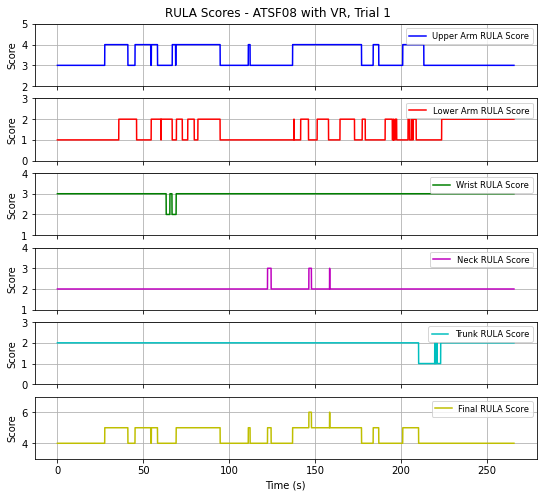

In [3]:
fig, axes = plt.subplots(6, 1, figsize=(9, 8), sharex=True, gridspec_kw={'hspace': 0.2})

scores = ['UpperArm_Score', 'LowerArm_Score', 'Wrist_Score', 'Neck_Score', 'Trunk_Score', 'Final_RULA_Score']
colors = ['b', 'r', 'g', 'm', 'c', 'y']
labels = ['Upper Arm RULA Score', 'Lower Arm RULA Score', 'Wrist RULA Score', 'Neck RULA Score', 'Trunk RULA Score', 'Final RULA Score']

for ax, score, color, label in zip(axes, scores, colors, labels):
    ax.plot(data['Time'], scores_df[score], linestyle='-', color=color, label=label)
    ax.set_ylabel('Score')
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)
    ax.set_ylim(min(scores_df[score]) - 1, max(scores_df[score]) + 1)

axes[-1].set_xlabel('Time (s)')
plt.suptitle('RULA Scores - ATSF08 with VR, Trial 1', y=0.91)

#plt.tight_layout()
#output_path = "Rula_scores.pdf"  # Specify your desired file path
#plt.savefig(output_path, format='pdf',bbox_inches='tight')

plt.show()

In [9]:
import re
import os
def extract_trial_number(filename):
    """Extract the trial number from the filename."""
    match = re.search(r'TRIAL-(\d+)', filename)
    return int(match.group(1)) if match else None

def analyze_csv_files(base_directory, output_file):
    results = []
    
    for study_type in ["CHIRON", "WBC"]:
        study_path = os.path.join(base_directory, study_type)
        print(study_path)
        if not os.path.exists(study_path):
            continue
        
        for vr_type in ["NO-VR", "WITH-VR"]:
            vr_path = os.path.join(study_path, vr_type)
            print(vr_path)
            if not os.path.exists(vr_path):
                continue
            
            for user_id in os.listdir(vr_path):
                user_path = os.path.join(vr_path, user_id)
                if not os.path.isdir(user_path):
                    continue
                print(user_path)
                user_path = os.path.join(user_path, 'CSVS')
                for csv_file in os.listdir(user_path):
                    if csv_file.endswith(".csv"):                        
                        file_path = os.path.join(user_path, csv_file)
                        print(file_path)
                        trial_number = extract_trial_number(csv_file)
                        
                        if trial_number is not None:
                            try:
                                scores,data = process_csv(file_path)

                                result_entry = {
                                    "User_ID": user_id,
                                    "Study_Type": study_type,
                                    "VR_Type": vr_type,
                                    "Trial_Number": trial_number,
                                }

                                result_entry.update(scores.to_dict())
                                results.append(result_entry)
                            except:
                                print("Error")
                                continue
    
    # Convert results to DataFrame and save to CSV
    df = pd.DataFrame(results)
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

# Example usage
base_directory = r'E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data'
output_file = r'E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\results_RULA_v2.csv'
analyze_csv_files(base_directory, output_file)

E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-NO-VR-TRIAL-1-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-NO-VR-TRIAL-2-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-NO-VR-TRIAL-3-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-WITH-VR-TRIAL-1-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-WITH-VR-TRIAL-2-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-RW-WITH-VR-TRIAL-3-MOTIVE.csv
Error
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\CHIRON\NO-VR\HASJ22\CSVS\HASJ22-SIM-NO-VR-MOTIVE.csv
E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\d